# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2024
## deadline: 14.2.2024 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Konsta Nyman

Student number: 523834

Student email: kokany@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=15 (15NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 15-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 15NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 15NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 15-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [7]:
# imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

### Read in the datasets

In [2]:
# read files
input_df = pd.read_csv('input.csv')
output_df = pd.read_csv('output.csv')
coordinates_df = pd.read_csv('coordinates.csv')

# print dimensions
print(f'Input dataframe dimensions: {input_df.shape}')
print(f'Output dataframe dimensions: {output_df.shape}')
print(f'Coordinates dataframe dimensions: {coordinates_df.shape}')

Input dataframe dimensions: (1690, 75)
Output dataframe dimensions: (1690, 1)
Coordinates dataframe dimensions: (1690, 2)


### Standardization of the predictor features (input.csv)

In [3]:
# z-score stardardization over the columns
scaler = StandardScaler() #create a scaler
input_df = pd.DataFrame(scaler.fit_transform(input_df)) #fit and transform

### Functions and analysis code

In [4]:
### Function to append unique values to the list ###
# lst: list to be appended to
# value: value to be appended to the list
def append_unique(list, value):
    if value not in list:
        list.append(value)


### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between 
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

### Results for spatial leave-one-out cross-validation with 15-nearest neighbor regression model

In [ ]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 15-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

# create a list to store results and to convert to a data frame later
sloo_c_index_list = []

# create leave-one-out cross-validator (only for creating indexes)
loo = LeaveOneOut()

# create knn model with 15 neighbors
knn_15 = KNeighborsRegressor(n_neighbors=15)

# get the distance matrix
distance_matrix = cdists(coordinates_df.to_numpy())


for d in range(0, 260, 10): # distance parameter loop

    # list to store predictions
    y_predictions = []


    # loo split
    for train_index, test_index in loo.split(input_df):
        X_train, X_test = input_df.iloc[train_index], input_df.iloc[test_index]
        y_train, y_test = output_df.iloc[train_index], output_df.iloc[test_index]

        # exclude all instances that are within the distance parameter
        drop_indexes = []
        for j in train_index:
            if distance_matrix[test_index[0]][j] < d:
                append_unique(drop_indexes, j)
        X_train = X_train.drop(drop_indexes)
        y_train = y_train.drop(drop_indexes)

        # fit k-NN model
        knn_15.fit(X_train, y_train)

        # make predictions
        preds = knn_15.predict(X_test)
        y_predictions.append(preds) #append predicted value to list

    # evaluate predictions using cindex evaluator
    sloo_c_index = cindex(output_df.to_numpy(), y_predictions)

    # create row to store results (row of upcoming data frame)
    row = [d, sloo_c_index]

    # add row to list
    sloo_c_index_list.append(row)

# create a data frame from list for plotting
sloo_c_index_df = pd.DataFrame(sloo_c_index_list, columns=['Distance parameter', 'C-index'])
        

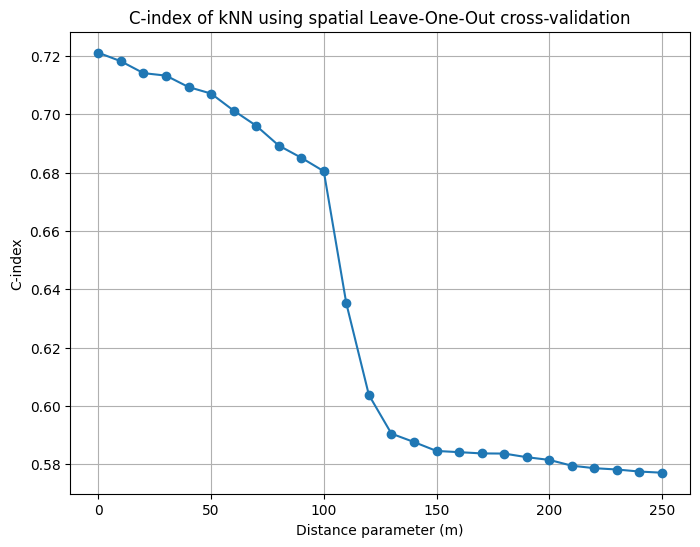

In [10]:
# plotting the results
plt.figure(figsize=(8, 6))
plt.plot(sloo_c_index_df['Distance parameter'], sloo_c_index_df['C-index'], marker='o', linestyle='-')
plt.title('C-index of kNN using spatial Leave-One-Out cross-validation')
plt.xlabel('Distance parameter (m)')
plt.ylabel('C-index')
plt.grid()
plt.show()

### Interpretation of the results

As we would expect the performance of the model decreases as the distance to the unknown data point increases. We can see a clear drop in the performance of the model after the 100 meter mark. This suggests that the predictions are quite reliable up to a 100 meters but beyond that they can't be trusted. Depending on the application we can choose a distance parameter and know the performance measure of that distance. If the performance demands are not as high we can select a sparser sampling grid.